# *Capstone project by Cornelia Blanke*
# *Time-series analysis and prediction for the HICP dataset of Eurostat*
___
# Machine Learning Task 1
> *For each of the main product categories 1-12, which characteristics (= features) have the strongest impact on the weights dataset?*
## Step 1: Data Preparation
The dataset consists of 29 numerical features from 31 countries. The targets are the weights of the main product categories in 2015.

The data was extracted, prepared and shortly analyzed in the proposal. It just need to be read in:

In [1]:
import numpy as np
import pandas as pd
import os

# read in the features of the countries
df_task1 = pd.read_csv(os.path.join('Data Proposal','df_task1.csv'), index_col=0)
display(df_task1.head())

# read in the targets, i.e. the weights, of the countries
df_task1_target = pd.read_csv(os.path.join('Data Proposal','df_task1_target.csv'), index_col=0)
display(df_task1_target.head())

,Unemployment rate,Population,Proportion 0-17,Proportion >64,Immigration/1000 inh,Emigration/1000 inh,Divorces/100 marriages,Income quintile share ratio,Risk of poverty rate,Very good health,...,Rail passengers/inh,Cars/100 inh,Killed in road acc/mio inh,Participation in tourism rate,Internet access rate,Patents/mio inh,Recycling rate,Homicides/100000 inh,Sexual violence/100000 inh,Thefts/100000 inh
Austria,6.150000,8584926.0,17.4,18.5,19.373842,6.603318,36.7,4.05,16.9,31.1,...,32.622296,55.306802,55.795472,58.78,82.0,233.15,67.1,0.49,40.57,1635.37
Belgium,8.500000,11237274.0,20.3,18.1,13.048182,7.990728,54.8,3.83,21.6,28.8,...,22.247388,50.043979,67.810040,48.98,82.0,139.69,81.5,2.06,61.30,2196.73
Bulgaria,9.150000,7202198.0,16.4,20.0,3.502125,4.091806,37.8,7.11,43.4,17.6,...,3.126546,43.903778,98.303324,21.57,59.0,4.43,64.1,1.75,8.37,531.99
Croatia,16.133333,4225316.0,18.1,18.8,2.770444,7.017463,30.3,5.16,24.4,24.6,...,5.123640,35.495617,82.360704,29.86,77.0,4.24,60.1,0.88,14.32,320.62
Cyprus,14.941667,847008.0,20.0,14.6,17.925451,20.286703,29.7,5.20,22.8,54.6,...,0.000000,57.578205,67.295704,53.12,71.0,10.34,59.8,1.42,2.48,111.33


,CP01,CP02,CP03,CP04,CP05,CP06,CP07,CP08,CP09,CP10,CP11,CP12
Austria,116.66,38.48,71.85,141.81,76.08,50.80,145.02,21.93,111.77,11.49,142.74,71.36
Belgium,159.85,47.59,57.30,146.49,78.29,71.55,142.09,34.21,91.88,5.50,72.74,92.52
Bulgaria,227.70,71.80,36.15,95.06,67.31,58.40,177.19,60.40,66.02,10.04,79.80,50.13
Croatia,211.36,67.89,49.03,139.79,56.85,49.30,119.84,35.72,91.86,17.40,96.06,64.90
Cyprus,175.07,70.96,64.25,72.56,54.80,60.82,114.17,41.42,64.03,34.17,183.24,64.51


## Step 2: Principal Component Analysis
In the proposal it was demonstrated that all features show a certain spread and thus are characteristic for the countries, but they are not independent. With the principal component analysis we can find out how much variance we really have in the selected features. The workflow is very similar to what we have learnt in the course.

In [2]:
X = df_task1.values

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scale data
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

# compute all principal components
pca = PCA()
X_rescaled_pca = pca.fit_transform(X_rescaled);

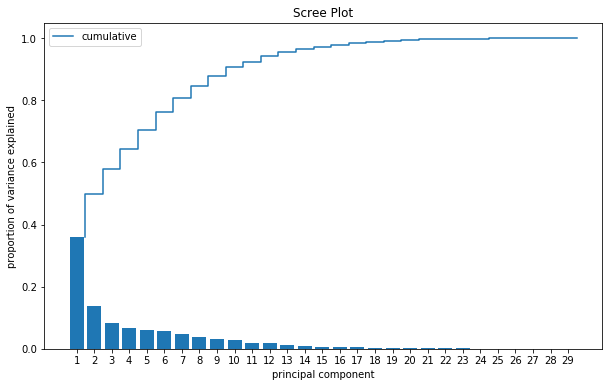

In [5]:
# Proportion of variance explained
pve = pca.explained_variance_ratio_

# Create bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [4]:
for min_limit in [0.8, 0.9, 0.95]:
    number_pca = (pve_cumsum <= min_limit).sum() + 1
    print('{} % of the variance can be explained by {:2d} principal components.'.format(int(min_limit*100), number_pca))

80 % of the variance can be explained by  7 principal components.
90 % of the variance can be explained by 10 principal components.
95 % of the variance can be explained by 13 principal components.


In [5]:
# variance explained by first two components
pve_cumsum[1]

0.4970091008525863

In [6]:
# variance explained by first five components
pve_cumsum[4]

0.7041538364869152

From the scree plot and the subsequent computations we see that
- the first principal component is more than twice as important as the second
- the second is significantly more important than the third
- then the differences from component to component are rather small
- we need approximately 10-15 components to cover a high level of variance

We may also look at the loadings in the matrix that defines the transformation between the original features' space and the principal components' space. Visually, for the first principal components, we find that there is not only one dominant feature in each component but there are always a lot of features having a medium-size impact on those components. That means that the components are neither parallel to nor simple linear combinations of the original features - it is much more complicated.

In [7]:
# Transformation matrix
df_results = pd.DataFrame(pca.components_.T, 
             index=df_task1.columns, columns=['Component '+str(i) for i in range(1, len(pca.components_)+1)])
df_results

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,...,Component 20,Component 21,Component 22,Component 23,Component 24,Component 25,Component 26,Component 27,Component 28,Component 29
Unemployment rate,0.151790,0.035468,-0.214575,0.066367,-0.123310,-0.290421,-0.443832,0.084582,-0.154061,-0.135888,...,-0.128587,-0.108482,0.135060,-0.011204,-0.135382,-0.102420,-0.011753,0.049540,0.008245,-0.176143
Population,-0.025556,-0.206394,-0.303674,0.018569,-0.149473,-0.128588,0.172183,0.042251,0.546444,-0.407374,...,0.044151,-0.062132,-0.168135,0.121974,0.089461,0.064388,-0.087781,-0.019197,-0.095925,0.001056
Proportion 0-17,-0.167832,0.237912,0.189797,-0.076893,-0.339181,-0.152272,-0.073430,0.106602,0.198193,0.137113,...,0.118084,0.015501,0.281066,-0.340556,-0.138610,0.111418,0.099947,-0.194250,-0.205164,0.013157
Proportion >64,0.062824,-0.372546,-0.182287,-0.180825,0.093004,-0.127752,-0.031695,-0.275832,-0.254733,-0.201512,...,0.168462,0.309198,-0.017131,-0.290787,0.088615,0.144766,0.033190,-0.096876,-0.282970,0.127055
Immigration/1000 inh,-0.150923,0.240751,-0.143583,-0.205624,0.380047,0.187486,0.001695,-0.041975,0.073914,0.117219,...,-0.213923,-0.257488,0.298077,-0.010633,-0.249181,0.171233,-0.147165,-0.149610,-0.124990,0.159890
Emigration/1000 inh,-0.026615,0.346268,0.048206,-0.199075,0.438468,-0.053633,-0.163845,0.068325,0.119366,0.090705,...,-0.071420,0.187446,-0.315353,-0.098065,0.544174,0.043613,0.046907,-0.089936,-0.026709,-0.209612
Divorces/100 marriages,-0.076606,-0.310110,0.043332,-0.049271,-0.006240,0.143283,-0.480274,0.108019,0.201681,0.237486,...,-0.015754,-0.137533,-0.188446,-0.175501,-0.038382,0.044258,0.154698,-0.196203,0.045764,0.206952
Income quintile share ratio,0.217354,-0.057810,-0.060994,-0.290023,0.146696,-0.315751,0.044850,0.129003,0.214963,0.021310,...,-0.263165,0.027581,0.067422,0.042297,-0.142334,-0.276611,-0.017261,-0.012114,-0.125994,0.382405
Risk of poverty rate,0.228261,-0.026025,-0.089137,-0.244551,0.070398,-0.315415,0.172196,0.136642,0.009108,0.180935,...,0.093639,-0.056496,-0.189040,-0.403922,-0.148181,0.226994,0.046826,0.273141,0.240482,-0.133034
Very good health,-0.111056,0.344921,-0.092848,0.186227,-0.041509,-0.354504,-0.043861,-0.157517,-0.153053,0.025854,...,0.399085,0.073126,-0.176171,0.047102,-0.090053,-0.114289,-0.283404,-0.407507,0.136616,0.180665


As expected the transformation matrix is orthogonal. That implies that $Q^{-1} = Q^T$ what makes it much easier to interpret the forward and backward transformation.

In [8]:
pd.DataFrame(np.round(np.matmul(df_results,df_results.T), 2))

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
1,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
2,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
3,0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
4,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
5,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
6,0.0,-0.0,-0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
7,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
8,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
9,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0


Let's now look deeper into the first two principal components. As pointed out above they already explain about 50% of the variance.

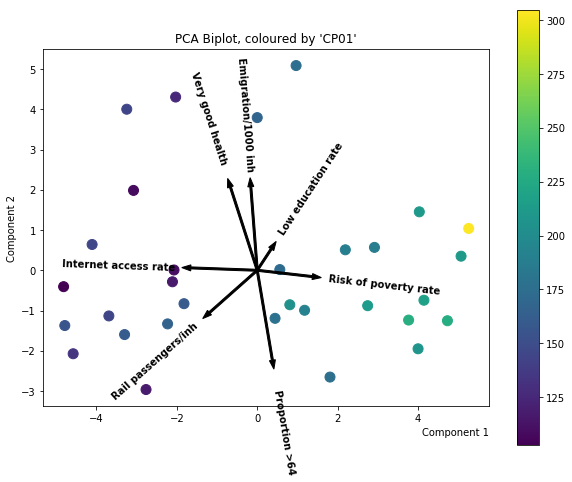

In [9]:
plt.figure(figsize=(10, 8))
# Scatter plot
plt.scatter(X_rescaled_pca[:,0], X_rescaled_pca[:,1], c=df_task1_target['CP01'], s=100)

# Plot a few features using the weights in the loading vectors
for feature in ['Proportion >64', 'Emigration/1000 inh', 'Risk of poverty rate', 'Very good health',
               'Low education rate', 'Rail passengers/inh', 'Internet access rate']:
    # Get weights
    weight1 = df_results.loc[feature, 'Component 1']*6        # rescale them
    weight2 = df_results.loc[feature, 'Component 2']*6

    # Plot arrows
    plt.arrow(0, 0, weight1, weight2, color='black', width=0.05)

    # Add text
    text = plt.text(
        weight1 / np.linalg.norm([weight1, weight2]) * (1.8 + np.linalg.norm([weight1, weight2])), # x location
        weight2 / np.linalg.norm([weight1, weight2]) * (1.8 + np.linalg.norm([weight1, weight2])), # y location
        feature, weight='bold', ha='center', va='center', 
        rotation=np.arctan(weight2/weight1)*180/np.pi)


# Labels and colorbar
plt.colorbar()
plt.axis('scaled')
plt.xlabel('Component 1', ha='right', x=1.0)
plt.ylabel('Component 2')
plt.title("PCA Biplot, coloured by 'CP01'")
plt.show()

The scatter plot above shows the first and the second principal component for all 31 countries, coloured by the weight of the main category 'CP01 Food'. We see that the darker dots (i.e. lower weights) are on the left and the lighter ones are on the right. There is no obvious gradient in the vertical direction. That means that the weight for 'CP01' depends on 'Component 1' but not on 'Component 2'.

In addition I have depicted the directions of some original features. We see that 'Component 1' is almost parallel to 'Risk of poverty rate' and antiparallel to 'Internet access rate'. Remember that during the proposal we have already found those two features to be strongly anti-correlated.

The length of the arrows (attention, they are scaled by a factor of 6 here!) shows their projection on the 'Component 1'-'Component 2'-plane and indicates which portion of their total length can be explained by the first two components. For example the arrow of 'Low education rate' is rather short, meaning that a big part of that feature is based in the space defined by 'Component 3' - 'Component 29'.

Instead of colouring the dots with the weights of 'CP01' we could have used each of the other main categories as well. That was done below. For many of these scatter plots there is no clear direction of a gradient; the colours seemed to be mixed up randomly. That means that the first two principal components are not sufficient to explain the variance in the weights.

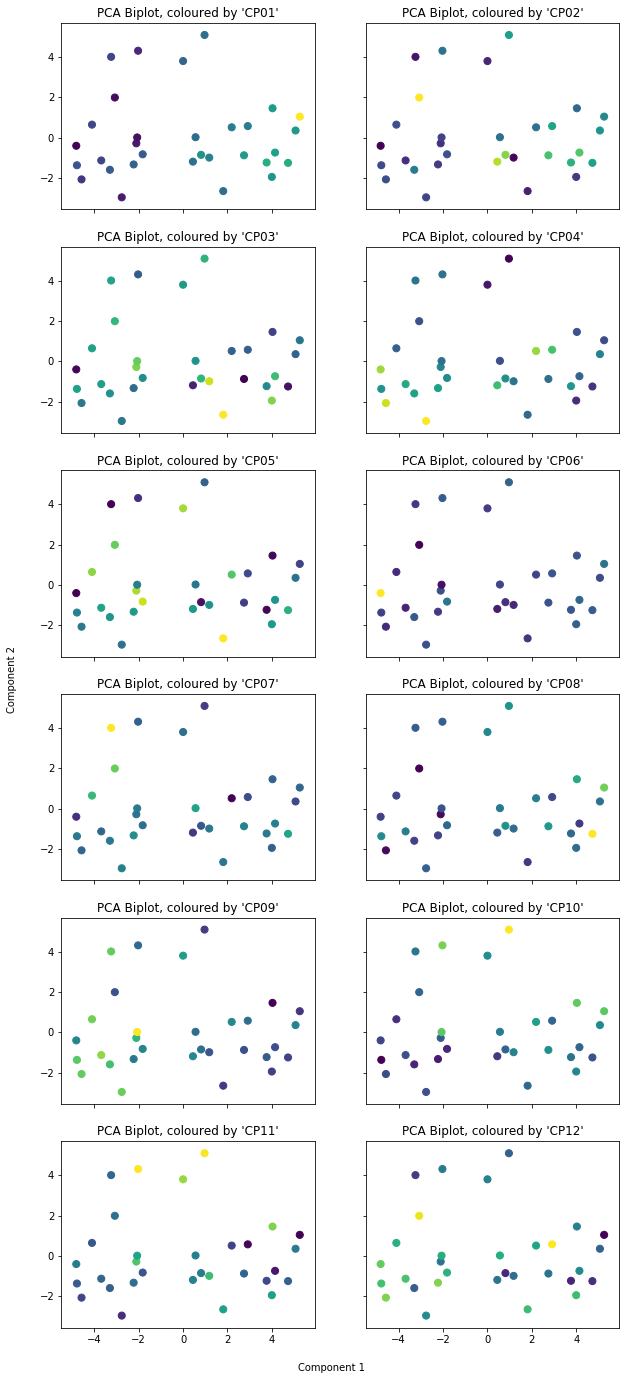

In [10]:
main_cat = df_task1_target.columns

fig, axes = plt.subplots(6, 2, figsize=(10, 24), sharex=True, sharey=True)

for cat, ax in zip(main_cat, axes.ravel()):
    ax.scatter(X_rescaled_pca[:,0], X_rescaled_pca[:,1], c=df_task1_target[cat], s=50)
    ax.set_title("PCA Biplot, coloured by '{}'".format(cat))

fig.text(0.5, 0.1, 'Component 1', ha='center')
fig.text(0.05, 0.5, 'Component 2', va='center', rotation='vertical')
plt.show()

In order not to overload the picture I have only depicted 6 vectors together with the scatter plot. But we can do the same for all 29 features. For some of them the projection in the 'Component 1'-'Component 2'-plane is so similar that it is hard to read the name. The longest projection is 'Proportion >64' and has a length slightly above 0.4.

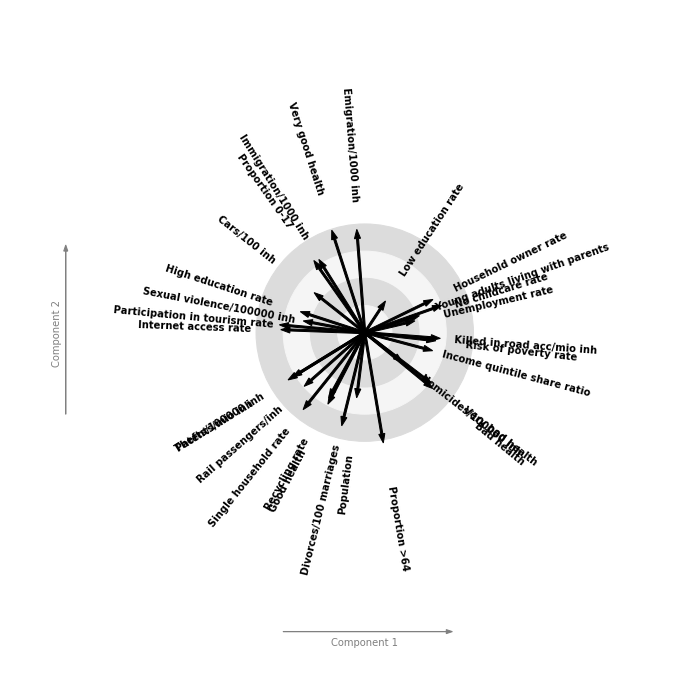

In [11]:
plt.figure(figsize=(12, 12))

# Plot features using the weights in the loading vectors
for feature in df_task1.columns:
    # Get weights
    weight1 = df_results.loc[feature, 'Component 1']
    weight2 = df_results.loc[feature, 'Component 2']

    # Plot arrows
    plt.arrow(0, 0, weight1, weight2, color='black', width=0.0075)

    # Add text
    text = plt.text(
        weight1 / np.linalg.norm([weight1, weight2]) * (0.35 + np.linalg.norm([weight1, weight2])), # x location
        weight2 / np.linalg.norm([weight1, weight2]) * (0.35 + np.linalg.norm([weight1, weight2])), # y location
        feature, weight='bold', ha='center', va='center', 
        rotation=np.arctan(weight2/weight1)*180/np.pi)

# Equally scaled coordinates
plt.axis('scaled')
plt.axis('off')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

# Draw_circle
plt.gcf().gca().add_artist(plt.Circle((0,0), 0.4, color='gainsboro', zorder=-1))
plt.gcf().gca().add_artist(plt.Circle((0,0), 0.3, color='whitesmoke', zorder=-1))
plt.gcf().gca().add_artist(plt.Circle((0,0), 0.2, color='gainsboro', zorder=-1))
plt.gcf().gca().add_artist(plt.Circle((0,0), 0.1, color='whitesmoke', zorder=-1))

# Imitate coordinate axis
plt.arrow(-0.3, -1.1, 0.6, 0, color='grey', head_width=0.015)
plt.arrow(-1.1, -0.3, 0, 0.6, color='grey', head_width=0.015)
plt.text(0, -1.15, 'Component 1', ha='center', color='grey')
plt.text(-1.15, 0, 'Component 2', va='center',rotation=90, color='grey')

plt.show()

In the proposal some pairs or groups of features showing very strong (anti-)correlation were identified. Let's find out what that implies for their PCA decomposition:

For many of these pairs/groups we see that the loading weights of the first few components are rather similar (if necessary, multiplied by -1), and that their difference is located in the higher ranked components.

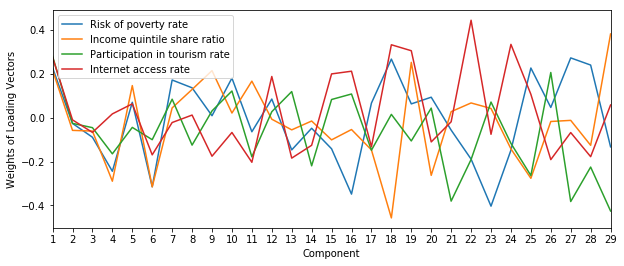

In [12]:
ax = df_results.loc[
    ['Risk of poverty rate', 'Income quintile share ratio', 'Participation in tourism rate', 'Internet access rate'], 
    :].mul([1,1,-1,-1], axis=0).T.plot(figsize=(10,4))
ax.set_xticks(np.arange(0,29))
ax.set_xticklabels(np.arange(1,30))
plt.xlabel('Component')
plt.ylabel('Weights of Loading Vectors')
plt.show()

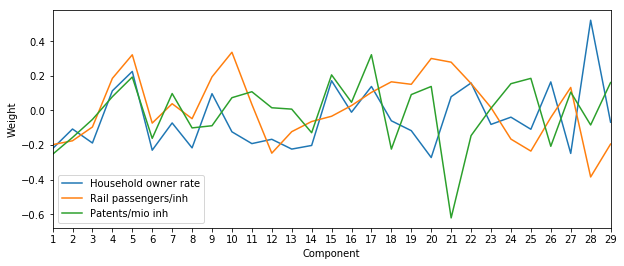

In [13]:
ax = df_results.loc[
    ['Household owner rate', 'Rail passengers/inh', 'Patents/mio inh'],
    :].mul([-1,1,1], axis=0).T.plot(figsize=(10,4))
ax.set_xticks(np.arange(0,29))
ax.set_xticklabels(np.arange(1,30))
plt.xlabel('Component')
plt.ylabel('Weight')
plt.show()

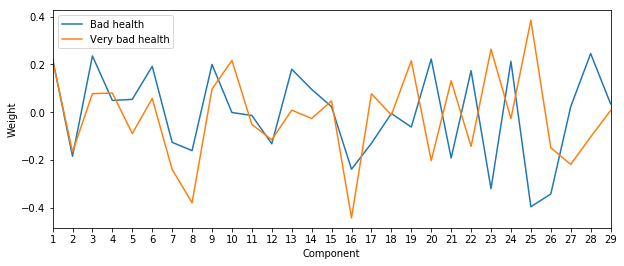

In [14]:
ax = df_results.loc[['Bad health', 'Very bad health'], :].T.plot(figsize=(10,4))
ax.set_xticks(np.arange(0,29))
ax.set_xticklabels(np.arange(1,30))

plt.xlabel('Component')
plt.ylabel('Weight')
plt.show()

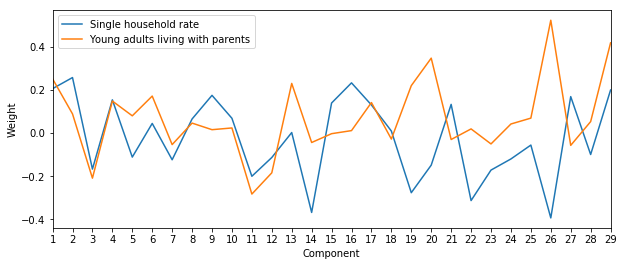

In [15]:
ax = df_results.loc[['Single household rate', 'Young adults living with parents'], 
                    :].mul([-1,1], axis=0).T.plot(figsize=(10,4))
ax.set_xticks(np.arange(0,29))
ax.set_xticklabels(np.arange(1,30))

plt.xlabel('Component')
plt.ylabel('Weight')
plt.show()

One of the goals of this PCA study was the identification of the five most important features in the original setup. The idea was to save them in a reduced dataframe `df_task1_reduced` that can be used for some of the subsequent tasks. However until now we have found out that
- several features are highly correlated and are thus more or less redundant
- there is no parallelism or easy transformation between the original features and the principal components

So in order to be able to pick out five important but uncorrelated features we need to pay attention to both the correlation matrix and the principal component transformation matrix.

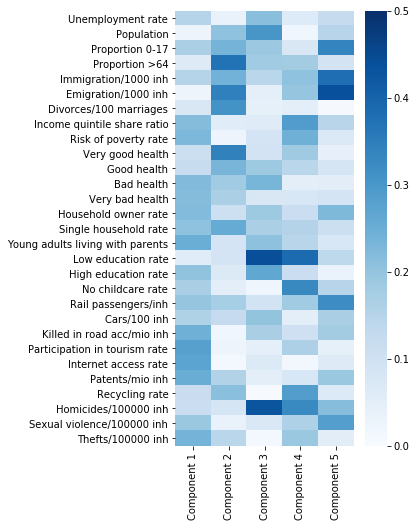

In [16]:
# Visualize the magnitude of the coefficients in the first five columns of the PCA transformation matrix
import seaborn as sns

plt.figure(figsize=(4,8))
sns.heatmap( abs(df_results.iloc[:,:5]), cmap="Blues", vmin=0, vmax=0.5)     # abs-value, sign is not important 
plt.show()

In [17]:
# Top-three of each column
for col in df_results.columns[:5]:
    print(col + ': ' + ', '.join(abs(df_results[col]).nlargest(3).index))

Component 1: Participation in tourism rate, Internet access rate, Patents/mio inh
Component 2: Proportion >64, Emigration/1000 inh, Very good health
Component 3: Low education rate, Homicides/100000 inh, Population
Component 4: Low education rate, No childcare rate, Homicides/100000 inh
Component 5: Emigration/1000 inh, Immigration/1000 inh, Proportion 0-17


We can easily identify the top-three of each column. But there are pairs that are highly (anti-)correlated, e.g. 'Participation in tourism rate' and 'Internet access rate'. And there are features that are listed twice. So let's also look at the correlations:

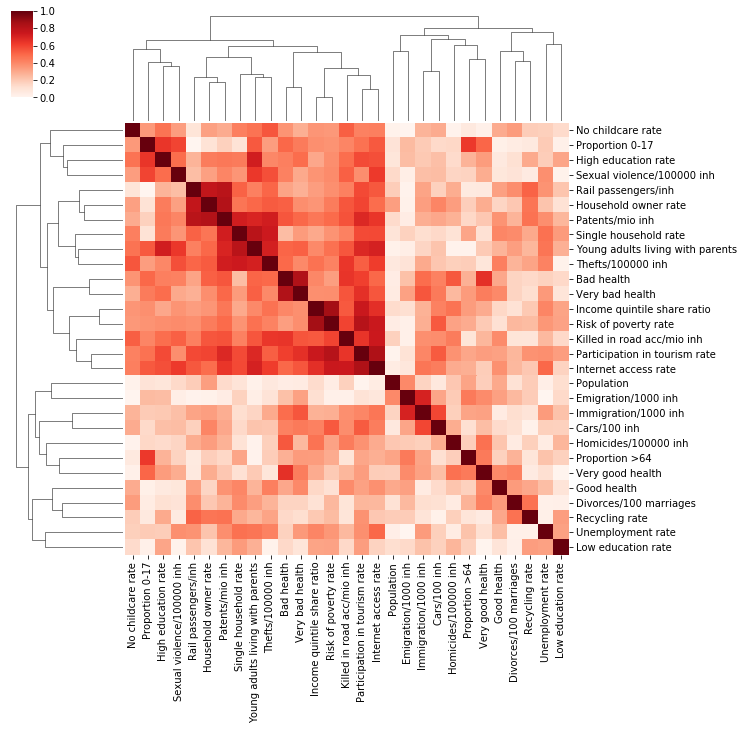

In [18]:
# Correlation matrix
sns.clustermap(abs(df_task1.corr()), cmap="Reds", vmin=0, vmax=1)       # abs-value, sign is not important
plt.show()

Here we do not only show the correlation matrix but also sort the features by clusters. So it is possible to distinguish which groups of features are highly correlated. Consequently for the reduced dataframe it makes sense to use features that are on the top-three lists above and that belong to rather different clusters. For the interpretation it is helpful to take meaningful features, that's why I took 'Risk of poverty rate' instead of 'Participation in tourism rate'.  

Considering all those points I decided to go on with these five features:
- Risk of poverty rate
- Proportion 0-17
- Proportion >64
- Low education rate
- Emigration/1000 inh

In [19]:
# Reduced dataframe with only five features
df_task1_reduced = \
    df_task1[['Risk of poverty rate', 'Proportion 0-17', 'Proportion >64', 'Low education rate', 'Emigration/1000 inh']]
df_task1_reduced

,Risk of poverty rate,Proportion 0-17,Proportion >64,Low education rate,Emigration/1000 inh
Austria,16.9,17.4,18.5,20.4,6.603318
Belgium,21.6,20.3,18.1,26.0,7.990728
Bulgaria,43.4,16.4,20.0,27.9,4.091806
Croatia,24.4,18.1,18.8,26.8,7.017463
Cyprus,22.8,20.0,14.6,27.2,20.286703
Czechia,13.0,17.8,17.8,11.2,2.437211
Denmark,18.6,20.7,18.6,22.9,7.884673
Estonia,23.6,18.6,18.8,19.5,9.889191
Finland,16.9,19.7,19.9,24.2,2.979849
France,18.4,22.2,18.4,24.9,4.883028


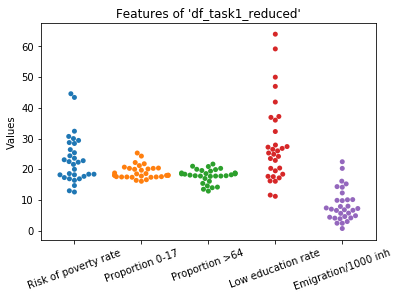

In [20]:
sns.swarmplot(data=df_task1_reduced)
plt.xticks(rotation=20)
plt.ylabel('Values')
plt.title("Features of 'df_task1_reduced'")
plt.show()

## Step 3: Linear Regression
The PCA in step 2 helped us to get some insights into the variance of the features but was not able to explain the differences in the weights of the main product categories. Even if the first two components were nominally able to cover 50% of the total variance we found in the biplots that some of the weights did not show any dependency from 'Component 1' and 'Component 2' at all.

It is mandatory to include not only the features but also the targets (i.e. the weights of the main product categories) into the analysis about the feature importance. It may be that one feature is particularly important for one feature but not for another. In the same way it may be that some of the weights cannot be explained by the selected features at all.

A simple but effective way of analyzing the strength of correlations between features and targets is to fit a linear regression model. If all features are scaled to the same range the coefficients of the linear model inform about the importance of each feature. But there is a problem here: we have 29 features and 31 samples, mathematically there is only one degree of freedom left in the linear regression fit what makes the model highly overfitted. So we restrict the analysis to the reduced dataframe `df_task1_reduced` which covers only five selected features.

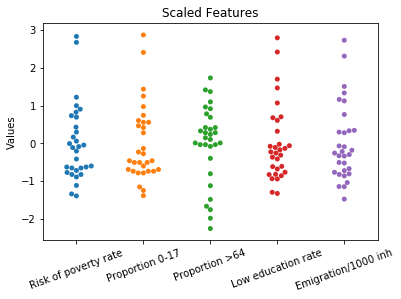

In [21]:
# Scale the features of df_task1_reduced
X = df_task1_reduced.values

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

ax = sns.swarmplot(data=X_rescaled)
ax.set_xticklabels(df_task1_reduced.columns)
plt.xticks(rotation=20)
plt.ylabel('Values')
plt.title("Scaled Features")
plt.show()

As explained in the proposal I will analyze the targets one-by-one. So all of the subsequent tasks will contain a loop over all main product categories. As a reference let's evaluate a baseline that predicts all datapoints as the mean value of the target:

In [22]:
from sklearn.metrics import mean_absolute_error as MAE

# Compute baseline MAE
results = []

# Loop over all main product categories
for cat in main_cat:
    y = df_task1_target[cat].values
    # Evaluate MAE
    results.append(MAE(y, np.full(len(y), np.mean(y))))
    
# Convert result to dataframe
df_baseline = pd.DataFrame(results, index=main_cat, columns=['MAE'])
df_baseline

,MAE
CP01,34.274214
CP02,17.228678
CP03,9.513861
CP04,29.538918
CP05,9.023809
CP06,13.568283
CP07,19.714527
CP08,6.066327
CP09,20.561707
CP10,5.856816


Let's define a total MAE as the mean of all separate MAEs:

In [23]:
# Total MAE Baseline
mae_baseline = df_baseline['MAE'].mean()
mae_baseline

17.74339576829691

Now let's fit a basic linear regression model and compare:

In [24]:
results = []

# Create a linear regression object
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

for cat in main_cat:
    y = df_task1_target[cat].values

    # Fit the model
    lr.fit(X_rescaled, y)
    # Evaluate MAE and save coefficients
    results.append(np.concatenate(([MAE(y, lr.predict(X_rescaled))], lr.coef_)))
    
# Convert result to dataframe
df_lr = pd.DataFrame(results, index=main_cat, columns=['MAE']+['Coef '+str(i) for i in range(1, len(lr.coef_)+1)])
df_lr

,MAE,Coef 1,Coef 2,Coef 3,Coef 4,Coef 5
CP01,22.726937,32.609127,-8.161864,-8.729519,-1.316877,-8.714276
CP02,11.176792,6.648042,-5.994833,-5.470323,-9.844130,5.153500
CP03,7.492879,-4.238912,0.436334,2.172702,6.546958,1.139133
CP04,18.797009,-11.026522,0.357244,4.937387,-18.574663,-9.131141
CP05,7.717153,-4.219729,-3.148026,-1.390056,4.644710,-2.822222
CP06,12.091636,4.356070,-2.659100,2.769388,-6.820748,6.815392
CP07,20.754016,-0.918486,11.696508,5.344336,4.225865,4.378751
CP08,4.862926,5.839189,-0.602440,-1.752999,-0.207790,-1.606759
CP09,12.882240,-13.715278,9.274381,5.511004,-1.089512,-5.735133
CP10,4.029985,3.344929,-1.070688,-4.312688,1.843990,0.631712


In [25]:
# Total MAE Linear Regression
mae_lr = df_lr['MAE'].mean()
mae_lr

13.57614244736177

All MAEs as well as the total MAE are smaller than the reference from the baseline. The computed coefficients of the linear model are neither extremely small or big - we will have a closer look later.

Before let's fit a second linear regression model, this time the Huber regressor. It relies on the $\varepsilon$ parameter that needs to be optimized:

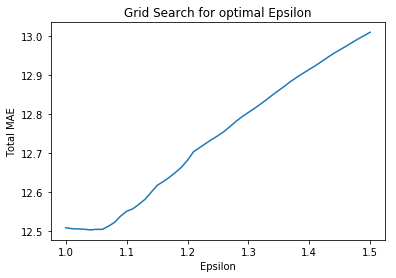

In [26]:
# Grid search for optimal epsilon
results_total = []
eps_values = np.arange(1, 1.51, 0.01)

from sklearn.linear_model import HuberRegressor
for eps in eps_values:
    # Create the estimator
    huber = HuberRegressor(epsilon=eps)
    
    results = []
    for cat in main_cat:
        y = df_task1_target[cat].values

        huber.fit(X_rescaled, y)
        results.append(MAE(y, huber.predict(X_rescaled)))
        
    # Compute total MAE for all main categories
    results_total.append(np.mean(results))
    
plt.plot(eps_values, results_total)   
plt.xlabel('Epsilon')
plt.ylabel('Total MAE')
plt.title('Grid Search for optimal Epsilon')
plt.show()

The optimal $\varepsilon$ is around 1.06 and will be used for the final Huber regressor:

In [27]:
# Use optimal epsilon
eps_opt = eps_values[np.argmin(results_total)]
huber = HuberRegressor(epsilon = eps_opt)

results = []
for cat in main_cat:
    y = df_task1_target[cat].values

    huber.fit(X_rescaled, y)
    results.append(np.concatenate(([MAE(y, huber.predict(X_rescaled))], huber.coef_)))
    
df_huber = pd.DataFrame(results, index=main_cat, columns=['MAE']+['Coef '+str(i) for i in range(1, len(lr.coef_)+1)])
df_huber

,MAE,Coef 1,Coef 2,Coef 3,Coef 4,Coef 5
CP01,21.296315,23.669060,-9.348003,-4.691911,-4.418651,-2.333741
CP02,10.423752,7.877859,-3.714886,-1.555699,-12.314781,7.114637
CP03,7.295809,-3.886011,-0.653350,1.366521,5.601365,1.519805
CP04,17.516774,-6.235604,-3.864661,-6.325758,-18.492320,-12.064630
CP05,7.230528,-7.925682,-2.014621,-2.526810,8.013426,-2.906981
CP06,10.350356,6.452353,-0.437110,-1.363448,-4.647016,3.813783
CP07,18.404311,1.171990,5.663860,12.166548,-1.051199,5.428454
CP08,4.692087,5.046000,-2.075991,-2.512919,-0.444003,-0.868405
CP09,12.412112,-17.205730,11.046944,10.937748,-2.599642,-5.629553
CP10,3.762142,2.899827,-2.567430,-5.324274,1.826181,-0.743458


In [28]:
# Total MAE Linear Regression
mae_huber = df_huber['MAE'].mean()
mae_huber

12.502372768705277

A comparison of the total MAEs and all calculated model coefficients can be found below. In many cases the basic linear regression model and the Huber regressor show a similar trend but there are some exceptions as well. The higher the magnitude of a coefficient is, the bigger is the importance of the corresponding feature onto the target.

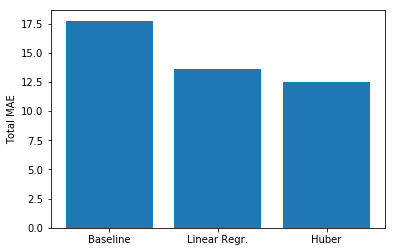

In [29]:
plt.bar(np.arange(3),[mae_baseline, mae_lr, mae_huber])
plt.xticks(ticks=np.arange(3), labels=['Baseline', 'Linear Regr.', 'Huber'])
plt.ylabel('Total MAE')
plt.show()

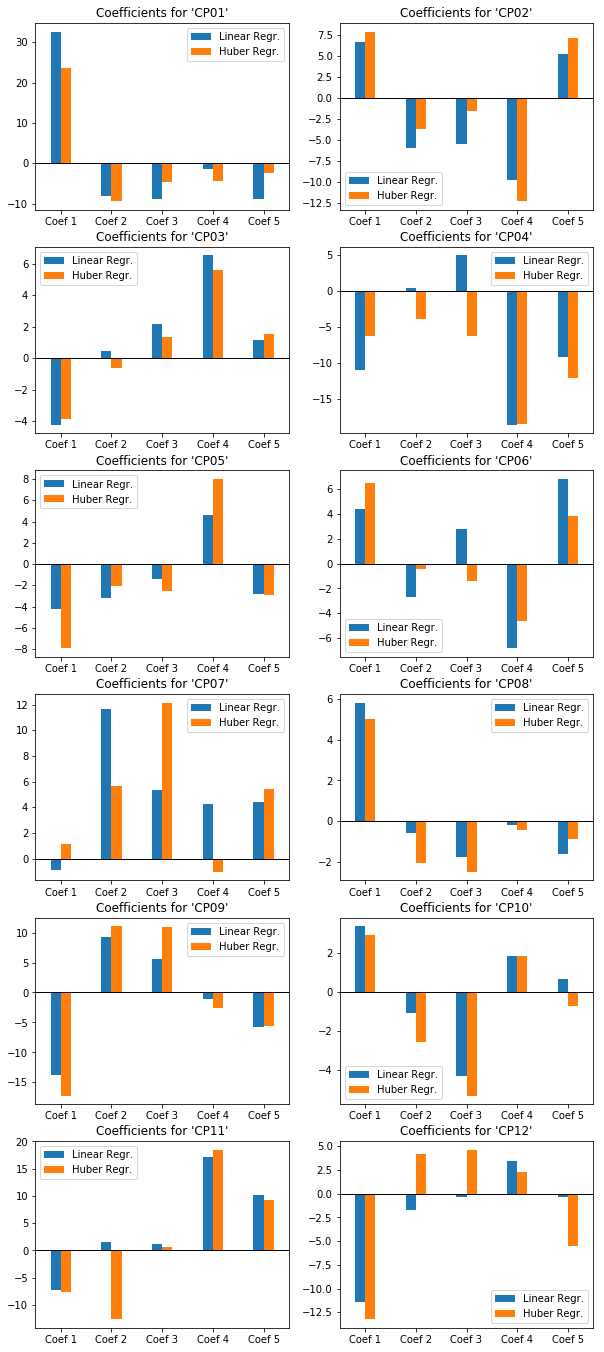

In [30]:
fig, axes = plt.subplots(6, 2, figsize=(10, 24))

labels = df_lr.columns[1:]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

for cat, ax in zip(main_cat, axes.ravel()):
    ax.bar(x-width/2, df_lr.loc[cat, 'Coef 1':], width, label='Linear Regr.')
    ax.bar(x+width/2, df_huber.loc[cat, 'Coef 1':], width, label='Huber Regr.')
    ax.hlines(0, -1, 6, lw=1)
    ax.set_title("Coefficients for '{}'".format(cat))
    ax.set_xlim(-0.5, 4.5)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
plt.show()

For many targets/weights we find that the first feature 'Risk of poverty rate' has a rather high positive or negative importance. In some cases also the forth feature 'Low education rate' seems to be an important one but paradoxically it is not so important in 'CP10 Education'.

It is difficult to say which of the observations are based on a direct causality and which are a random or indirect correlation. For example I do not see a logical reason why a rather high 'Low education rate' should induce a higher weight for 'CP03 Clothing' and a lower weight for 'CP04 Housing'. But maybe there is another hidden commonality between the countries having a similar value for the 'Low education rate' that we do not cover here.

### Overfitting and Regularization
In the course we have also learnt about linear regression models that avoid overfitting by making use of regularization. The models above using the reduced dataframe do not show any signs of overfitting:
- there are much more samples than features
- the calculated coefficients do not take any extreme values

In that case there is no benefit in adding regularization. But if we had used the full dataframe we would have computed an overfitting model. Let's try it out and see if we can deduce some information about feature importance:

In [31]:
# Scale all features of df_task1
X_full = df_task1.values
X_full_rescaled = scaler.fit_transform(X_full)

In [32]:
# Apply linear regression to full set of features
results = []

for cat in main_cat:
    y = df_task1_target[cat].values

    # Fit the linear regression model
    lr.fit(X_full_rescaled, y)
    # Evaluate MAE and save coefficients
    results.append(np.concatenate(([MAE(y, lr.predict(X_full_rescaled))], lr.coef_)))
    
df_lr_full = pd.DataFrame(results, index=main_cat, columns=['MAE']+['Coef '+str(i) for i in range(1, len(lr.coef_)+1)])
df_lr_full

,MAE,Coef 1,Coef 2,Coef 3,Coef 4,Coef 5,Coef 6,Coef 7,Coef 8,Coef 9,...,Coef 20,Coef 21,Coef 22,Coef 23,Coef 24,Coef 25,Coef 26,Coef 27,Coef 28,Coef 29
CP01,1.710850,10.205642,3.678285,11.838787,10.592552,-17.062330,24.930131,-0.155754,-4.799994,-17.409889,...,25.305773,4.498089,8.269302,-78.438111,4.883093,-5.624332,-8.732189,-11.055943,-11.807330,-19.454679
CP02,1.504617,2.403261,-8.251610,-6.138768,1.993631,-1.478435,-6.111260,4.013200,-3.989474,41.527529,...,3.192971,9.278538,-2.123361,25.399707,18.440518,-11.247934,11.607877,-6.416104,1.742171,14.637046
CP03,0.609030,-18.675754,-1.542857,-28.710215,-13.650333,6.316656,-33.504340,14.441813,55.161053,-14.593974,...,-38.135363,-16.287480,18.080000,75.785429,3.803342,23.695650,-10.199103,4.893359,2.933415,46.574808
CP04,0.320662,55.566505,23.908903,38.688535,-4.850272,-4.070566,43.434087,-59.207103,-87.029508,-16.737108,...,102.301241,45.373069,-26.604678,-185.648256,18.906953,-29.146922,38.794525,8.035092,-28.533682,-88.843665
CP05,1.051692,-9.340791,-3.845060,-13.895158,-12.629598,13.764875,-27.202703,6.750714,14.191148,-4.367294,...,-26.242611,-13.145379,7.041181,47.931021,-10.758819,4.283726,0.291688,17.031607,2.475257,20.643812
CP06,0.042457,57.075180,2.593054,14.834557,-26.725663,-65.236560,89.892617,-76.042821,-135.254268,27.099099,...,105.708240,50.764598,-29.376129,-183.498260,-4.734697,-30.919812,43.684322,2.308731,0.651489,-106.734522
CP07,3.825056,-33.263064,-1.540339,15.840407,27.759845,15.973637,-3.720524,36.728724,51.511332,-9.511636,...,-43.894285,-17.261352,29.112561,82.934430,-23.840128,20.002734,-35.616944,-30.715886,28.976148,21.054302
CP08,0.608893,3.886821,-2.791159,1.096299,-3.128100,-4.384478,13.171292,1.667167,-22.073740,11.427493,...,-8.054099,0.330542,-10.125485,-29.358272,5.848656,-9.801450,3.563906,7.761050,0.957223,-18.973661
CP09,0.173446,-29.012459,5.984731,-12.992042,8.098168,29.646314,-25.154950,13.352397,27.484840,-26.757065,...,-47.482872,-30.670625,1.731182,58.067154,-5.351403,24.909388,-6.827129,17.509930,3.669394,11.829253
CP10,0.426718,-1.142193,-0.868473,-12.541991,-9.964910,-5.053250,-6.589916,-1.630830,2.809974,12.793349,...,-8.002997,-2.632006,0.515651,19.165352,10.787546,1.013923,3.505029,4.520191,-0.202394,9.236163


In [33]:
# Total MAE
df_lr_full['MAE'].mean()

1.3135719168892055

In [34]:
print('Maximum coefficient:', df_lr_full.iloc[:,1:].max().max())
print('Minimum coefficient:', df_lr_full.iloc[:,1:].min().min())

Maximum coefficient: 190.72778671895855
Minimum coefficient: -185.6482563971026


- The maximum and minimum coefficients are one order of magnitude greater now but I still would not call them "extreme".
- Much more important: The separate MAEs as well as the total MAE are very small now. That means the model is very accurate on the samples what is a sign for overfitting.

So let's add Ridge regularization and vary the strength $\alpha$:

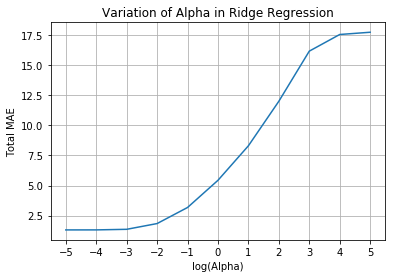

In [35]:
# Variation of alpha in Ridge regression
results_total = []
alpha_values = np.logspace(-5, 5, num=11)

from sklearn.linear_model import Ridge
for alpha in alpha_values:
    # Create the estimator
    ridge = Ridge(alpha=alpha)
    
    results = []
    for cat in main_cat:
        y = df_task1_target[cat].values

        ridge.fit(X_full_rescaled, y)
        results.append(MAE(y, ridge.predict(X_full_rescaled)))
        
    # Compute total MAE for all main categories
    results_total.append(np.mean(results))
    
plt.plot(np.log10(alpha_values), results_total)  
plt.xticks(np.arange(-5,6,1))
plt.xlabel('log(Alpha)')
plt.ylabel('Total MAE')
plt.title('Variation of Alpha in Ridge Regression')
plt.grid()
plt.show()

- For very small $\alpha$ the total MAE tends towards the total MAE without regularization (as expected).
- For very big $\alpha$ the total MAE tends towards a maximum value (as expected, we did not compute a baseline here).
- For $\alpha$ between 1 and 100 the total MAE is still lower than the one computed with the reduced dataframe.

Let's see the result if we use $\alpha=1$:

In [36]:
# Ridge regression with alpha=1
ridge = Ridge(alpha=1)

results = []
for cat in main_cat:
    y = df_task1_target[cat].values

    # Fit the model
    ridge.fit(X_full_rescaled, y)
    # Evaluate MAE and save coefficients
    results.append(np.concatenate(([MAE(y, ridge.predict(X_full_rescaled))], ridge.coef_)))
    
df_ridge = pd.DataFrame(results, index=main_cat, columns=['MAE']+['Coef '+str(i) for i in range(1, len(ridge.coef_)+1)])
df_ridge

,MAE,Coef 1,Coef 2,Coef 3,Coef 4,Coef 5,Coef 6,Coef 7,Coef 8,Coef 9,...,Coef 20,Coef 21,Coef 22,Coef 23,Coef 24,Coef 25,Coef 26,Coef 27,Coef 28,Coef 29
CP01,4.961097,0.243345,-2.730259,-1.334123,2.352909,-11.340011,3.113298,6.500609,8.388641,0.377562,...,-6.167251,-7.761444,9.344963,-13.186110,4.631186,4.226407,-6.591689,0.870070,-5.773947,0.740759
CP02,5.048895,-1.755655,-2.966455,0.359043,3.946936,7.160510,1.541438,8.777953,-1.956059,11.793923,...,-1.860442,1.140626,0.796697,3.058715,5.884518,-10.575102,3.562357,-1.348714,-1.072469,2.706969
CP03,4.236569,1.073194,1.797747,-6.548418,-6.510274,-1.747701,-0.824264,-2.496510,7.065642,-8.139189,...,-2.299961,2.524689,1.034138,-0.967125,1.780142,1.508068,3.273233,1.417474,1.703957,2.220502
CP04,9.977884,5.179319,8.442382,3.244295,-6.297273,5.629445,-10.495209,-4.453105,3.689684,-9.787166,...,3.050261,-3.339956,-1.010951,-6.167608,16.412277,10.042205,3.775596,7.997050,-13.092257,2.374158
CP05,3.823704,-0.127642,0.131818,-1.721030,-2.683607,5.364706,-6.730600,-1.859096,-3.701574,-3.976263,...,1.592178,0.653828,1.151006,2.672332,-8.289287,-3.806292,4.993375,3.478466,0.620236,1.739570
CP06,5.544941,-3.061276,-4.286018,2.889936,-0.498316,-12.824501,5.470758,-2.555989,-3.104635,1.183882,...,13.546111,2.092021,-0.809530,-7.059892,-8.816271,17.956947,-6.205893,4.816221,-2.952536,-6.450703
CP07,6.781969,-1.886931,0.645047,7.302684,1.567765,-0.181242,11.133751,-0.847570,-1.012454,10.079514,...,-4.680436,8.161804,15.186592,15.103898,-6.450251,-0.879931,-7.858500,-11.865627,19.692828,-9.184375
CP08,2.449635,-1.931843,-1.785838,-1.222939,2.910103,-0.067412,0.011632,2.294628,-0.827367,5.299157,...,-3.404867,-1.336753,-1.790577,-2.807626,1.125042,0.509688,-0.508649,-0.464761,1.058993,-3.398301
CP09,5.164098,-7.140907,2.589135,-5.743207,2.034624,5.360421,-4.607923,-5.878420,-3.107885,-10.018177,...,-7.921510,-7.592848,-2.816437,3.928179,4.534859,2.775276,3.716301,2.486360,6.161304,-5.290843
CP10,1.869642,0.000829,1.223924,-2.358301,-2.344769,-0.524678,-0.100220,-0.976284,0.926654,2.016257,...,-0.236346,-1.307515,-1.399740,0.327995,3.007995,-1.316422,0.313221,0.644167,-1.222068,-0.067886


In [37]:
print('Maximum coefficient:', df_ridge.iloc[:,1:].max().max())
print('Minimum coefficient:', df_ridge.iloc[:,1:].min().min())

Maximum coefficient: 19.692827683761184
Minimum coefficient: -19.69967357754747


As expected the MAE is now around 5 and the magnitude of the coefficients is reduced. But it is hard (or impossible) to draw any conclusions...

Let's now do the same for the Lasso regularization:

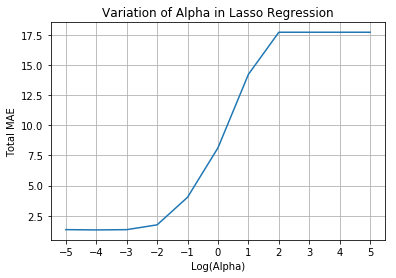

In [38]:
# Variation of alpha in Lasso regression
results_total = []
alpha_values = np.logspace(-5, 5, num=11)

from sklearn.linear_model import Lasso
for alpha in alpha_values:
    # Create the estimator
    lasso = Lasso(alpha=alpha, max_iter=100000)
    
    results = []
    for cat in main_cat:
        y = df_task1_target[cat].values

        lasso.fit(X_full_rescaled, y)
        results.append(MAE(y, lasso.predict(X_full_rescaled)))
        
    # Compute total MAE for all main categories
    results_total.append(np.mean(results))
    
plt.plot(np.log10(alpha_values), results_total)   
plt.xticks(np.arange(-5,6,1))
plt.xlabel('Log(Alpha)')
plt.ylabel('Total MAE')
plt.title('Variation of Alpha in Lasso Regression')
plt.grid()
plt.show()

The total MAE tends again to the same limits for very small or very big $\alpha$ values. For $\alpha$ between 1 and 10 it is higher than before and takes values around 8-14. An interesting property of the Lasso regressor is that it reduces the number of non-zero coefficients. We will see what happens for $\alpha=1$ and $\alpha=10$:

In [39]:
# Lasso regression with alpha=1
lasso = Lasso(alpha=1, max_iter=100000)

results = []
for cat in main_cat:
    y = df_task1_target[cat].values

    # Fit the model
    lasso.fit(X_full_rescaled, y)
    # Evaluate MAE and save coefficients
    results.append(np.concatenate(([MAE(y, lasso.predict(X_full_rescaled))], lasso.coef_)))
    
df_lasso = pd.DataFrame(results, index=main_cat, columns=['MAE']+['Coef '+str(i) for i in range(1, len(lasso.coef_)+1)])
df_lasso

,MAE,Coef 1,Coef 2,Coef 3,Coef 4,Coef 5,Coef 6,Coef 7,Coef 8,Coef 9,...,Coef 20,Coef 21,Coef 22,Coef 23,Coef 24,Coef 25,Coef 26,Coef 27,Coef 28,Coef 29
CP01,7.570117,0.000000,-3.653507,-0.000000,3.339760,-7.728399,0.000000,1.579477,9.643724,0.998306,...,-3.953927,-7.131924,7.179536,-4.299371,-0.000000,0.000000,-3.055952,0.000000,-2.226022,0.000000
CP02,7.677837,-0.910178,-0.841646,-0.000000,0.000000,5.523149,2.429341,5.677796,0.000000,1.065278,...,-0.000000,-0.000000,4.636056,-0.000000,0.000000,-7.075023,0.000000,0.000000,-0.000000,0.000000
CP03,6.569470,0.000000,0.663042,-0.000000,0.000000,-0.000000,-0.000000,0.308600,1.909452,-2.263671,...,-0.000000,1.978974,-0.000000,-0.000000,0.000000,-0.000000,0.000000,1.168510,0.586102,0.000000
CP04,13.203770,0.000000,8.018521,0.000000,-0.314490,-0.000000,-3.700223,-0.216506,-0.000000,-5.223032,...,1.057765,-5.564630,-0.000000,-0.000000,11.415694,10.830085,1.670857,-0.000000,-7.090151,0.000000
CP05,7.160825,-0.000000,0.000000,-0.682646,0.000000,0.050631,-0.133110,0.000000,-2.276295,-0.000000,...,-0.000000,0.861794,0.000000,-0.000000,-0.452314,-0.053898,1.599196,0.000000,-0.000000,0.221185
CP06,7.733322,-0.000000,-3.056910,0.000000,-0.000000,-5.681690,4.798393,-4.570444,0.000000,0.134394,...,10.054356,-0.000000,-0.000000,-0.174039,-10.573218,14.834989,-3.489832,0.842650,-0.032106,-5.188034
CP07,10.695650,-0.000000,0.000000,2.289139,-0.000000,0.000000,3.288335,-0.000000,0.000000,7.079835,...,-0.000000,9.919363,15.311324,7.530292,0.000000,-1.348745,-7.363122,-4.062837,13.867591,-2.722169
CP08,4.769279,-0.000000,-0.107292,-0.000000,0.000000,-0.000000,-0.070306,-0.100948,-0.000000,3.755188,...,-1.640867,-0.164947,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
CP09,8.078255,-3.942066,0.000000,-0.454077,0.048647,0.000000,-5.998502,-3.398831,-0.000000,-4.404002,...,-0.000000,-0.000000,-2.535785,0.000000,5.784165,0.000000,-0.000000,-0.000000,5.500917,0.000000
CP10,3.316129,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.934068,0.753268,0.118275,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.025373,-0.000000,-0.000000,-0.000000,-0.000000


In [40]:
# Rate of non-zero coefficients
(df_lasso.loc[:,'Coef 1':]!=0).sum().sum() / (29*12)

0.4540229885057471

In [41]:
# List non-zero coefficients
for cat in main_cat:
    # Number of nonzero entries
    nr_entries = (df_lasso.loc[cat,'Coef 1':]!=0).sum()
    # Find indices of corresponding features (sorted by coef. magnitude)
    if nr_entries > 0:
        idx_entries = abs(df_lasso.iloc[:,1:]).T.nlargest(nr_entries,cat).index.str.lstrip('Coef ').values.astype(int) - 1
    
    print(cat + ': Number of nonzero entries = ' + str(nr_entries))
    if nr_entries > 0:
        print(', '.join(df_task1.columns[idx_entries]))
    print('\n')

CP01: Number of nonzero entries = 16
Household owner rate, Income quintile share ratio, Immigration/1000 inh, Killed in road acc/mio inh, Cars/100 inh, Very bad health, High education rate, Participation in tourism rate, Rail passengers/inh, Population, Proportion >64, Recycling rate, No childcare rate, Sexual violence/100000 inh, Divorces/100 marriages, Risk of poverty rate


CP02: Number of nonzero entries = 12
Low education rate, Patents/mio inh, Divorces/100 marriages, Immigration/1000 inh, Killed in road acc/mio inh, Household owner rate, Emigration/1000 inh, Bad health, Risk of poverty rate, Unemployment rate, Population, No childcare rate


CP03: Number of nonzero entries = 12
Low education rate, Risk of poverty rate, Cars/100 inh, Income quintile share ratio, No childcare rate, Homicides/100000 inh, Population, Sexual violence/100000 inh, Very good health, Divorces/100 marriages, Bad health, High education rate


CP04: Number of nonzero entries = 16
Low education rate, Internet

In [42]:
# Same for lasso regression with alpha=10
lasso = Lasso(alpha=10, max_iter=100000)

results = []
for cat in main_cat:
    y = df_task1_target[cat].values

    # Fit the model
    lasso.fit(X_full_rescaled, y)
    # Evaluate MAE and save coefficients
    results.append(np.concatenate(([MAE(y, lasso.predict(X_full_rescaled))], lasso.coef_)))
    
df_lasso = pd.DataFrame(results, index=main_cat, columns=['MAE']+['Coef '+str(i) for i in range(1, len(lasso.coef_)+1)])

# Rate of non-zero coefficients
display((df_lasso.loc[:,'Coef 1':]!=0).sum().sum() / (29*12))
print('-----------------------------------')

# List non-zero coefficients
for cat in main_cat:
    # Number of nonzero entries
    nr_entries = (df_lasso.loc[cat,'Coef 1':]!=0).sum()
    # Find indices of corresponding features (sorted by coef. magnitude)
    if nr_entries > 0:
        idx_entries = abs(df_lasso.iloc[:,1:]).T.nlargest(nr_entries,cat).index.str.lstrip('Coef ').values.astype(int) - 1
    
    print(cat + ': Number of nonzero entries = ' + str(nr_entries))
    if nr_entries > 0:
        print(', '.join(df_task1.columns[idx_entries]))
    print('\n')

0.06896551724137931

-----------------------------------
CP01: Number of nonzero entries = 8
Household owner rate, Participation in tourism rate, Internet access rate, Income quintile share ratio, Killed in road acc/mio inh, Cars/100 inh, Risk of poverty rate, Immigration/1000 inh


CP02: Number of nonzero entries = 1
Killed in road acc/mio inh


CP03: Number of nonzero entries = 0


CP04: Number of nonzero entries = 4
Low education rate, Rail passengers/inh, Patents/mio inh, Emigration/1000 inh


CP05: Number of nonzero entries = 0


CP06: Number of nonzero entries = 0


CP07: Number of nonzero entries = 3
Sexual violence/100000 inh, Cars/100 inh, No childcare rate


CP08: Number of nonzero entries = 0


CP09: Number of nonzero entries = 3
Internet access rate, Sexual violence/100000 inh, Young adults living with parents


CP10: Number of nonzero entries = 0


CP11: Number of nonzero entries = 4
Very good health, Low education rate, Unemployment rate, Single household rate


CP12: Number of nonzero entrie

In the first case ($\alpha=1$) about 45% of the coefficients are non-zero. That results in 7-17 relevant features per target. I listed all of them above, sorted by the magnitude of the coefficient. 

In the second case ($\alpha=10$) only 7% of the coefficients are non-zero. For several main product categories there are no non-zero coefficients at all whereas for 'CP01 Food' there are still 8 non-zero coefficients.

Again for many of the feature/target correlations the interpretation remains a mystery:
- For 'CP01 Food' we find many features in the list that are strongly correlated to the 'Risk of poverty rate'. That makes sense and fits in with what we already know.
- For the weights of 'CP02 Alcohol and Tobacco' we find a correlation with 'Killed in road acc/mio inh'. Well, even if we know that alcohol plays a role in road accidents I am not sure if there is really a causality between the weight of alcohol and tobacco and the number of accidents. If we look at the scatter plot we find that there is indeed a correlation:

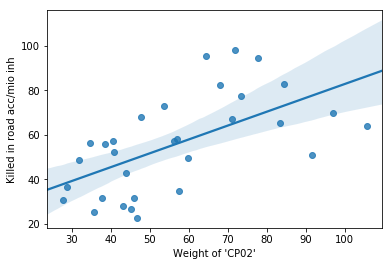

In [43]:
sns.regplot(df_task1_target['CP02'], df_task1['Killed in road acc/mio inh'])
plt.xlabel("Weight of 'CP02'")
plt.ylabel('Killed in road acc/mio inh')
plt.show()

- For 'CP07 Transport' and 'CP09 Recreation and culture' a strong correlation with 'Sexual violence/100000 inh' is detected. Here I really cannot imagine a story behind. Anyhow, the term 'Sexual violence/100000 inh' is misleading as this is not the number of actual crimes but the number of reported crimes. In countries with a higher awareness about sexual violence the number is by orders of magnitude higher. So I conclude that the correlation is not due to the rate of sexual violence but due to some other hidden features that those countries have in common.

In [44]:
df_task1['Sexual violence/100000 inh'].sort_values(ascending=False)

United Kingdom    172.00
Sweden            156.32
Iceland           134.31
Norway             84.37
Belgium            61.30
Luxembourg         58.26
Finland            50.66
France             50.06
Ireland            49.30
Denmark            46.13
Germany            42.20
Austria            40.57
Switzerland        32.90
Netherlands        24.61
Malta              24.22
Portugal           23.57
Latvia             23.46
Estonia            21.60
Hungary            17.11
Spain              16.14
Croatia            14.32
Czechia            13.49
Slovenia           12.51
Slovakia           11.90
Lithuania           9.00
Romania             8.76
Bulgaria            8.37
Italy               7.42
Poland              7.25
Greece              5.10
Cyprus              2.48
Name: Sexual violence/100000 inh, dtype: float64

## Step 4: Decision Tree Regressor and Random Forest Regressor
The Decision Tree regressor or more generally the Random Forest regressor may also be used for getting an idea about the importance of different features. The Decision Tree itself provides an intuitive visualization about which features matters most, which is the second, and so on. In addition there is as well the numerical output of the `feature_importance_` property.
### Decision Tree Regressor
Let's first compute a Decision Tree regressor for each target. I do not specify the maximum depth, i.e. the tree is split until it perfectly fits the dataset.

In [45]:
# All features
X = df_task1.values

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

# Create decision tree
dt = DecisionTreeRegressor(criterion='mse', random_state=0)

In [47]:
# Make folder
try:       
    os.makedirs(os.path.join('Data Project', 'Trees')) 
except FileExistsError:
    pass

results = []
for idx,cat in enumerate(main_cat):
    y = df_task1_target[cat].values
    
    # Fit model
    dt.fit(X,y)
    
    # Evaluate MAE and save feature importances
    results.append(np.concatenate(([MAE(y, dt.predict(X))], dt.feature_importances_)))
    
    # Export decision tree (until depth 2) to dot_data
    dot_data = export_graphviz(dt, \
        out_file=None, feature_names=df_task1.columns, max_depth=2, \
        filled=True, rounded=True, proportion=True)
    
    # Save decision tree as png
    graph = graphviz.Source(dot_data, format='png')
    graph.render(os.path.join('Data Project','Trees','tree_'+str(idx+1)))   

df_dt = pd.DataFrame(results, index=main_cat, columns=np.concatenate((['MAE'], df_task1.columns)))
df_dt

,MAE,Unemployment rate,Population,Proportion 0-17,Proportion >64,Immigration/1000 inh,Emigration/1000 inh,Divorces/100 marriages,Income quintile share ratio,Risk of poverty rate,...,Rail passengers/inh,Cars/100 inh,Killed in road acc/mio inh,Participation in tourism rate,Internet access rate,Patents/mio inh,Recycling rate,Homicides/100000 inh,Sexual violence/100000 inh,Thefts/100000 inh
CP01,0.0,0.004499,0.000000,0.000000e+00,0.017856,0.000000,0.002824,0.000205,0.000000,0.000184,...,0.085267,0.000008,0.000000,0.068189,2.032889e-03,0.000537,0.007521,0.000000,0.616104,0.000024
CP02,0.0,0.046722,0.038892,0.000000e+00,0.000057,0.008376,0.018581,0.000927,0.000000,0.127841,...,0.000000,0.001878,0.480905,0.000356,1.303741e-03,0.000000,0.028370,0.004647,0.000000,0.000039
CP03,0.0,0.053423,0.068153,8.063511e-03,0.014980,0.000000,0.000000,0.004657,0.220262,0.000427,...,0.000217,0.001484,0.000000,0.000000,7.786330e-05,0.002387,0.000019,0.041746,0.000000,0.002323
CP04,0.0,0.002456,0.000000,0.000000e+00,0.090258,0.017977,0.000000,0.065850,0.000000,0.000000,...,0.247559,0.002258,0.006850,0.011700,5.452408e-03,0.072183,0.000000,0.004621,0.000000,0.000000
CP05,0.0,0.028535,0.000000,1.728219e-02,0.000000,0.000000,0.023164,0.000042,0.083502,0.000069,...,0.000632,0.108803,0.000775,0.000000,3.853550e-06,0.000000,0.000000,0.001595,0.007796,0.000053
CP06,0.0,0.000017,0.000000,0.000000e+00,0.000000,0.000275,0.000002,0.000000,0.000000,0.001300,...,0.000252,0.007890,0.007210,0.000000,1.880025e-01,0.000000,0.000000,0.000021,0.000000,0.000000
CP07,0.0,0.001720,0.000000,4.918033e-07,0.019969,0.158157,0.063499,0.000000,0.090079,0.000000,...,0.023430,0.530327,0.020966,0.000000,2.220799e-06,0.000000,0.003836,0.061856,0.000000,0.008762
CP08,0.0,0.000000,0.050633,0.000000e+00,0.001103,0.001370,0.000303,0.000000,0.049014,0.507527,...,0.149716,0.043259,0.000000,0.076924,2.390290e-06,0.000065,0.017555,0.016713,0.000000,0.023997
CP09,0.0,0.021316,0.000616,0.000000e+00,0.000242,0.002400,0.000326,0.007119,0.101355,0.030233,...,0.000034,0.000000,0.009705,0.000000,9.702349e-03,0.000000,0.000000,0.142030,0.000000,0.000091
CP10,0.0,0.000024,0.007912,1.888344e-04,0.000000,0.007640,0.000401,0.539892,0.000000,0.000009,...,0.040472,0.000000,0.002570,0.000707,0.000000e+00,0.007563,0.000000,0.001001,0.118193,0.157145


In [48]:
# Rate of non-zero coefficients
(df_dt.loc[:,'Unemployment rate':]!=0).sum().sum() / (29*12)

0.6551724137931034

The dataframe above tells us that all MAEs are zero (i.e. perfect fit). About one third of the values of the feature importance are computed as zero, some others are extremely small.

In order not to overcrowd this notebook I have saved the first two levels of the trees to .png files. Here is one example:

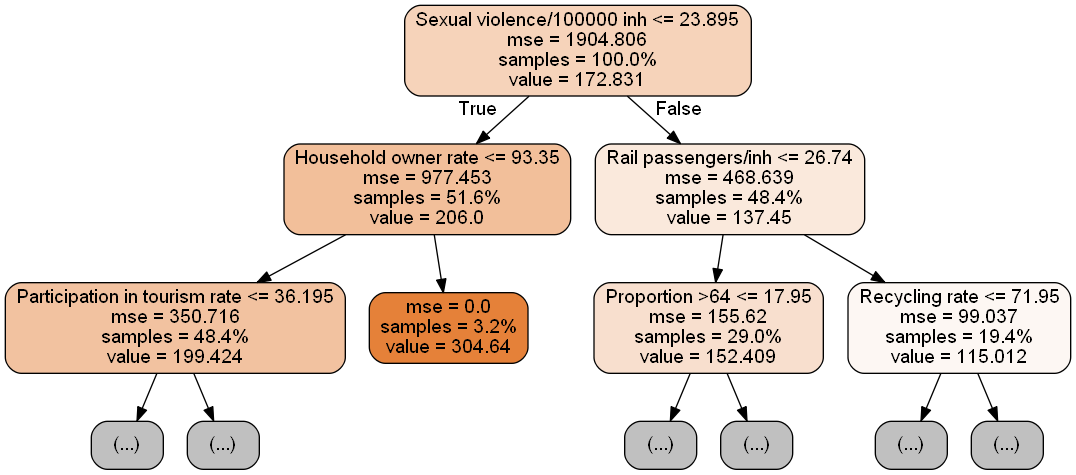

In [49]:
# Load and display Decision Tree for the weights of 'CP01'
from IPython.display import Image
Image(os.path.join('Data Project','Trees','tree_1.png'), width=800) 

Again, 'Sexual violence/100000 inh' is computed as the most important feature - this time for 'CP01 Food'! And again the most important feature for 'CP02 Alcohol and tobacco' is 'Killed in road acc/mio inh'.

It is also interesting to find that this time 'Cars/100 inh' is the most important feature for 'CP07 Transport'.

In [50]:
df_dt_topfive = pd.DataFrame(index=df_dt.index, columns=['1st', '2nd', '3rd', '4th', '5th'])
for cat in main_cat:
    df_dt_topfive.loc[cat,:] = df_dt.iloc[:,1:].T.nlargest(5,cat).index

df_dt_topfive

,1st,2nd,3rd,4th,5th
CP01,Sexual violence/100000 inh,Household owner rate,Rail passengers/inh,Participation in tourism rate,Proportion >64
CP02,Killed in road acc/mio inh,Bad health,Risk of poverty rate,Very good health,Unemployment rate
CP03,No childcare rate,Income quintile share ratio,Very good health,Population,Single household rate
CP04,Low education rate,Rail passengers/inh,Proportion >64,Patents/mio inh,Divorces/100 marriages
CP05,Very good health,Bad health,Cars/100 inh,Good health,Income quintile share ratio
CP06,Household owner rate,Internet access rate,High education rate,Bad health,Good health
CP07,Cars/100 inh,Immigration/1000 inh,Income quintile share ratio,Emigration/1000 inh,Homicides/100000 inh
CP08,Risk of poverty rate,Rail passengers/inh,Participation in tourism rate,Population,Income quintile share ratio
CP09,Young adults living with parents,Homicides/100000 inh,Income quintile share ratio,Household owner rate,High education rate
CP10,Divorces/100 marriages,Thefts/100000 inh,Sexual violence/100000 inh,Young adults living with parents,Rail passengers/inh


The decision trees above were calculated with `random_state=0`. Let's compute a second version with `random_state=1`:

In [51]:
# Same for random_state=1
dt1 = DecisionTreeRegressor(criterion='mse', random_state=1)

results = []
for idx,cat in enumerate(main_cat):
    y = df_task1_target[cat].values
    
    # Fit model
    dt1.fit(X,y)
    
    # Evaluate MAE and save feature importances
    results.append(np.concatenate(([MAE(y, dt1.predict(X))], dt1.feature_importances_)))

df_dt1 = pd.DataFrame(results, index=main_cat, columns=np.concatenate((['MAE'], df_task1.columns)))

df_dt1_topfive = pd.DataFrame(index=df_dt1.index, columns=['1st', '2nd', '3rd', '4th', '5th'])
for cat in main_cat:
    df_dt1_topfive.loc[cat,:] = df_dt1.iloc[:,1:].T.nlargest(5,cat).index

df_dt1_topfive

,1st,2nd,3rd,4th,5th
CP01,Sexual violence/100000 inh,Household owner rate,Rail passengers/inh,Participation in tourism rate,Homicides/100000 inh
CP02,Killed in road acc/mio inh,Homicides/100000 inh,Risk of poverty rate,Very good health,Unemployment rate
CP03,Income quintile share ratio,No childcare rate,Very good health,Population,Good health
CP04,Low education rate,Rail passengers/inh,Proportion >64,Patents/mio inh,Divorces/100 marriages
CP05,Very good health,Bad health,Cars/100 inh,Good health,Income quintile share ratio
CP06,Household owner rate,Internet access rate,High education rate,Income quintile share ratio,Good health
CP07,Cars/100 inh,Immigration/1000 inh,Income quintile share ratio,Emigration/1000 inh,Proportion >64
CP08,Risk of poverty rate,Rail passengers/inh,Income quintile share ratio,Population,Cars/100 inh
CP09,Young adults living with parents,Homicides/100000 inh,Income quintile share ratio,Patents/mio inh,High education rate
CP10,Divorces/100 marriages,Thefts/100000 inh,Sexual violence/100000 inh,Young adults living with parents,Rail passengers/inh


There are some similarities but also some discrepancies in comparison to the first top-five dataframe. An evaluation will be presented later.

### Random Forest Regressor
Instead of a unique decision tree we can analogously use a Random Forest regressor:

In [52]:
# Define Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=0)

results = []
for cat in main_cat:
    y = df_task1_target[cat].values
    
    # Fit model
    rf.fit(X,y)
    
    # Evaluate MAE and save feature importances
    results.append(np.concatenate(([MAE(y, rf.predict(X))], rf.feature_importances_)))  

df_rf = pd.DataFrame(results, index=main_cat, columns=np.concatenate((['MAE'], df_task1.columns)))
df_rf

,MAE,Unemployment rate,Population,Proportion 0-17,Proportion >64,Immigration/1000 inh,Emigration/1000 inh,Divorces/100 marriages,Income quintile share ratio,Risk of poverty rate,...,Rail passengers/inh,Cars/100 inh,Killed in road acc/mio inh,Participation in tourism rate,Internet access rate,Patents/mio inh,Recycling rate,Homicides/100000 inh,Sexual violence/100000 inh,Thefts/100000 inh
CP01,6.204094,0.002816,0.002204,0.004290,0.003337,0.009556,0.001583,0.016941,0.074379,0.059794,...,0.063217,0.017911,0.019140,0.119169,0.079684,0.118621,0.002315,0.013563,0.153957,0.105884
CP02,5.081245,0.053146,0.021355,0.003071,0.005862,0.004605,0.023815,0.036597,0.013661,0.009395,...,0.014753,0.009613,0.330137,0.006915,0.019229,0.045232,0.011517,0.040805,0.031848,0.077881
CP03,3.169477,0.030535,0.033164,0.036839,0.010422,0.047575,0.023119,0.020973,0.045008,0.073235,...,0.014748,0.043666,0.026852,0.006490,0.010309,0.008762,0.012186,0.014773,0.011763,0.013119
CP04,8.960519,0.004112,0.030087,0.010292,0.018777,0.022172,0.012118,0.009124,0.012535,0.024815,...,0.088942,0.012289,0.007401,0.011935,0.021551,0.054668,0.018428,0.051602,0.013025,0.006351
CP05,3.429035,0.006239,0.012497,0.004057,0.015864,0.020702,0.147391,0.037803,0.097024,0.019837,...,0.032175,0.060133,0.003791,0.012730,0.007953,0.017750,0.034313,0.015685,0.005897,0.054409
CP06,5.158648,0.079854,0.021122,0.010025,0.008241,0.014413,0.006886,0.017446,0.005677,0.005998,...,0.144105,0.006563,0.048150,0.048930,0.062094,0.139758,0.010026,0.028196,0.003289,0.001802
CP07,7.672006,0.051610,0.057819,0.025712,0.066700,0.038778,0.027941,0.004009,0.040948,0.026979,...,0.008818,0.099639,0.010767,0.014209,0.220583,0.007128,0.006508,0.015013,0.030705,0.016894
CP08,2.246965,0.012629,0.022287,0.014650,0.005712,0.028177,0.013830,0.033128,0.026113,0.322137,...,0.121427,0.031815,0.030510,0.057983,0.022124,0.046222,0.012156,0.011246,0.048659,0.015964
CP09,5.459639,0.019554,0.003661,0.006147,0.010667,0.012255,0.016728,0.006503,0.061977,0.095066,...,0.004199,0.006735,0.074213,0.010350,0.178004,0.044682,0.003481,0.008862,0.063030,0.040789
CP10,1.661190,0.008400,0.009040,0.015670,0.007625,0.007238,0.008275,0.239256,0.009316,0.017447,...,0.021209,0.017227,0.004716,0.031427,0.003384,0.021163,0.012139,0.004598,0.033626,0.051642


In [53]:
df_rf_topfive = pd.DataFrame(index=df_rf.index, columns=['1st', '2nd', '3rd', '4th', '5th'])
for cat in main_cat:
    df_rf_topfive.loc[cat,:] = df_rf.iloc[:,1:].T.nlargest(5,cat).index

df_rf_topfive

,1st,2nd,3rd,4th,5th
CP01,Sexual violence/100000 inh,Participation in tourism rate,Patents/mio inh,Thefts/100000 inh,Internet access rate
CP02,Killed in road acc/mio inh,Thefts/100000 inh,Bad health,Unemployment rate,Patents/mio inh
CP03,No childcare rate,Low education rate,Risk of poverty rate,Immigration/1000 inh,Income quintile share ratio
CP04,Low education rate,Rail passengers/inh,Patents/mio inh,Homicides/100000 inh,Household owner rate
CP05,Emigration/1000 inh,Good health,Very good health,Income quintile share ratio,Cars/100 inh
CP06,Household owner rate,Rail passengers/inh,Patents/mio inh,Unemployment rate,Internet access rate
CP07,Internet access rate,Cars/100 inh,No childcare rate,Proportion >64,Population
CP08,Risk of poverty rate,Rail passengers/inh,Participation in tourism rate,Sexual violence/100000 inh,Patents/mio inh
CP09,Young adults living with parents,Internet access rate,Risk of poverty rate,Killed in road acc/mio inh,Sexual violence/100000 inh
CP10,Divorces/100 marriages,Single household rate,Very good health,Low education rate,Good health


In [54]:
# Same for random_state=1
rf1 = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=1)

results = []
for cat in main_cat:
    y = df_task1_target[cat].values
    
    # Fit model
    rf1.fit(X,y)
    
    # Evaluate MAE and save feature importances
    results.append(np.concatenate(([MAE(y, rf1.predict(X))], rf1.feature_importances_)))  

df_rf1 = pd.DataFrame(results, index=main_cat, columns=np.concatenate((['MAE'], df_task1.columns)))

Now let's compare all the Decision Tree and Random Forest results that we got:

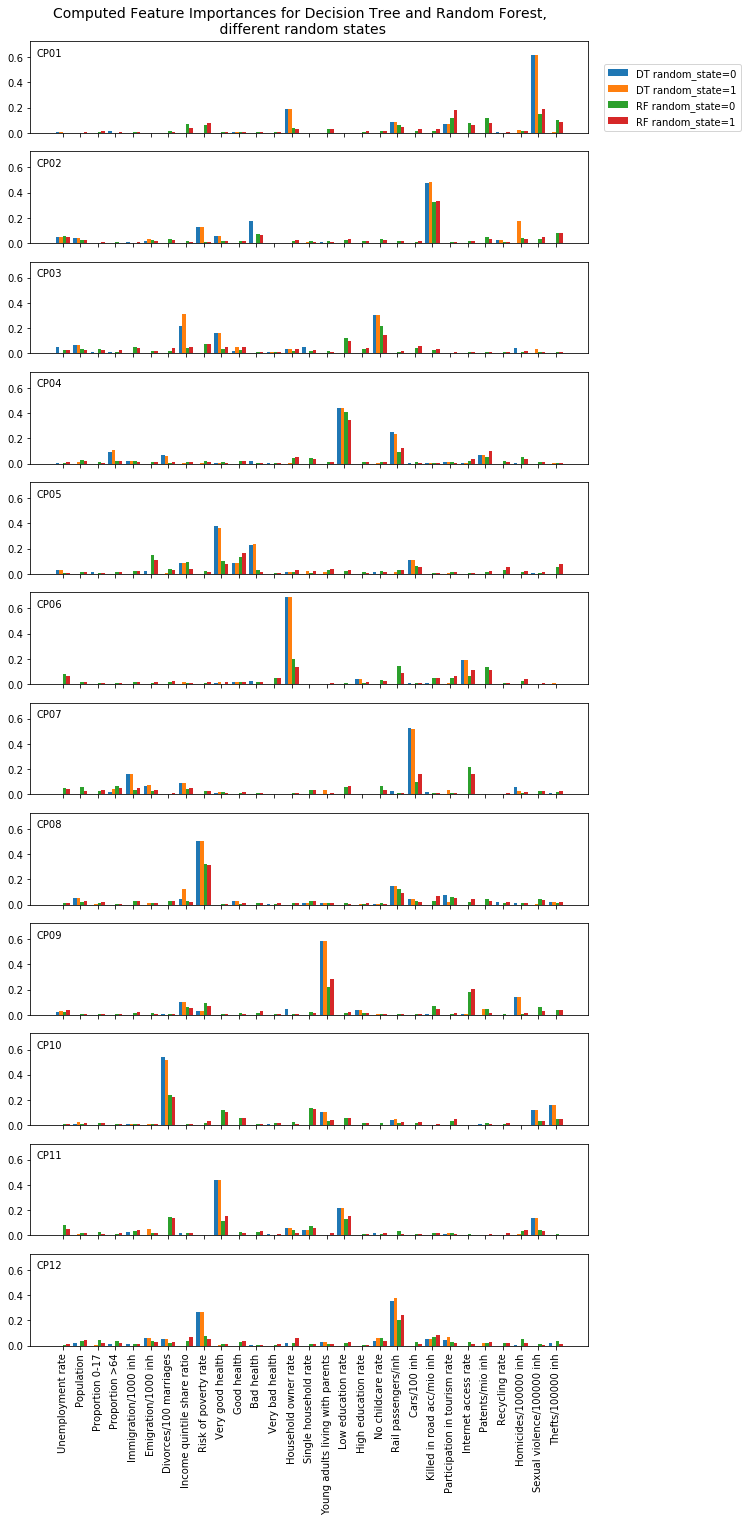

In [55]:
fig, axes = plt.subplots(12, 1, figsize=(10, 24), sharex=True, sharey=True)

width = 0.2

for cat, ax in zip(main_cat, axes.ravel()):
    ax.bar(np.arange(df_dt.shape[1]-1) - 1.5*width, df_dt.loc[cat,'Unemployment rate':], width, label='DT random_state=0')
    ax.bar(np.arange(df_dt.shape[1]-1) - 0.5*width, df_dt1.loc[cat,'Unemployment rate':], width, label='DT random_state=1')
    ax.bar(np.arange(df_dt.shape[1]-1) + 0.5*width, df_rf.loc[cat,'Unemployment rate':], width, label='RF random_state=0')
    ax.bar(np.arange(df_dt.shape[1]-1) + 1.5*width, df_rf1.loc[cat,'Unemployment rate':], width, label='RF random_state=1')
    ax.annotate(cat, xy=(6, 85), xycoords='axes points', size=10, ha='left', va='top')
    ax.set_xticks(np.arange(df_dt.shape[1]-1))
    ax.set_xticklabels(df_dt.columns[1:], rotation=90)
    
plt.suptitle("Computed Feature Importances for Decision Tree and Random Forest,\n different random states", 
             y=0.9, fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 14))
plt.show()

Even if there are some differences between the different setups we can clearly see which are the dominant features. For example:
- for 'CP01 Food':<br> 'Sexual violence/100000 inh', 'Participation in tourism rate', 'Rail passengers/inh'...
- for 'CP02 Alcohol and tobacco':<br> 'Killed in road acc/mio inh' (very dominant!)
- for 'CP08 Communications':<br> 'Risk of poverty rate' (very dominant!), 'Rail passengers/inh'...

## Step 5: Feature permutation in kNN Regressor
When preparing my proposal it happened to me to read about feature permutation as a mean to judge about feature importance. In the newer scikit-learn versions there is even available a predefined method. But it can also be done by hand. The idea is to shuffle randomly the values of a certain feature and to see if that has a strong influence on the quality of the prediction. If yes, the feature is an important one!

I will apply this method to a kNN regressor fitted on the reduced feature set:

In [56]:
# Use and scale the features of df_task1_reduced
X = df_task1_reduced.values
X_rescaled = scaler.fit_transform(X)

In [57]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

results = []
for cat in main_cat:
    y = df_task1_target[cat].values
    
    # Fit model
    knn.fit(X_rescaled,y)
    
    # Evaluate MAE and save feature importances
    results.append(MAE(y, knn.predict(X_rescaled)))
    
    # loop over all features, i.e. all columns of X
    for idx in np.arange(X_rescaled.shape[1]):        
        X_shuffle = X_rescaled.copy()         # copy needed, as X_rescaled must not be changed
        mean_shuffle = 0

        # Repeat five times
        for counter in np.arange(5):
            np.random.shuffle(X_shuffle[:,idx])         # Shuffle column idx of X_shuffle 
            mean_shuffle += MAE(y, knn.predict(X_shuffle))/5
        results.append(mean_shuffle)

df_knn = pd.DataFrame(np.reshape(results,(12,6)), index=main_cat,
                      columns=['MAE w/o Shuffle', 'MAE Shuffle 1', 'MAE Shuffle 2',
                               'MAE Shuffle 3', 'MAE Shuffle 4', 'MAE Shuffle 5'])
df_knn

,MAE w/o Shuffle,MAE Shuffle 1,MAE Shuffle 2,MAE Shuffle 3,MAE Shuffle 4,MAE Shuffle 5
CP01,19.501226,31.691910,23.853406,22.031445,21.795174,22.300400
CP02,11.892516,13.876052,13.302542,11.750619,16.190413,11.101471
CP03,8.053290,8.399858,8.038490,7.737432,9.811819,8.367458
CP04,23.115484,24.389355,23.568168,23.803123,26.463394,23.416116
CP05,8.025032,8.327329,8.164297,7.737406,9.045368,8.298013
CP06,12.179032,12.736181,12.801535,11.986503,12.711910,14.061639
CP07,19.476581,19.292297,19.042400,20.604968,19.103484,19.174168
CP08,4.768000,6.318323,5.038555,4.889019,5.183187,4.918335
CP09,11.764645,18.661187,15.575806,13.220723,14.041161,14.484465
CP10,4.282839,4.851781,4.794323,4.791174,4.712413,4.733897


In the dataframe above we find in the first column the MAEs for the unpermutated feature set. Then in the next columns we find the mean MAEs of five times shuffling the respective feature 1-5. 

Let's present the results graphically:

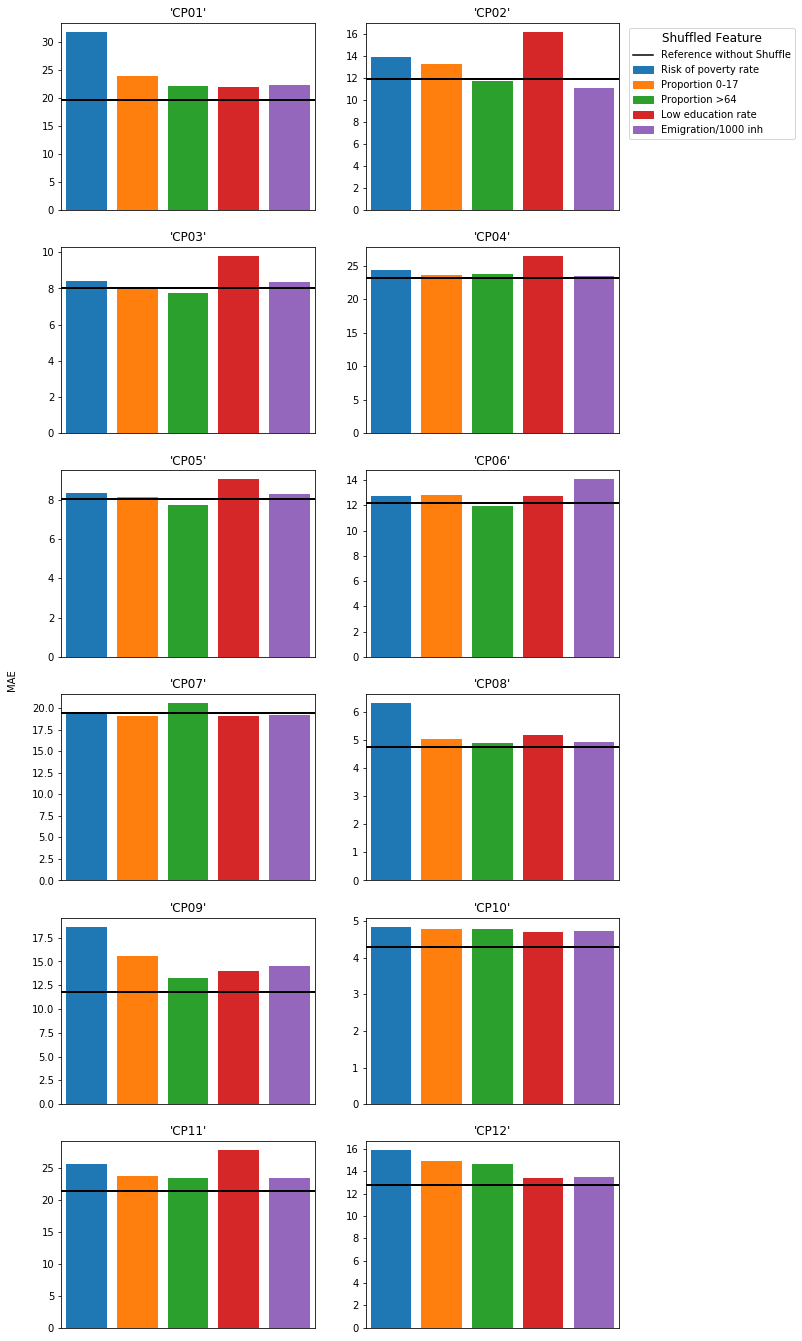

In [58]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

fig, axes = plt.subplots(6, 2, figsize=(10, 24))

for cat, ax in zip(main_cat, axes.ravel()):
    ax.bar(np.arange(X_rescaled.shape[1]), df_knn.loc[cat, 'MAE Shuffle 1':], 
           color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple'])
    
    ax.hlines(df_knn.loc[cat, 'MAE w/o Shuffle'], -1, 6, lw=2)      # unpermutated reference
    ax.set_title("'{}'".format(cat))
    ax.set_xlim(-0.5, 4.5)
    ax.set_xticks([])

line = Line2D([0], [0], label='Reference without Shuffle', color='k')
blue_patch = Patch(color='tab:blue', label=df_task1_reduced.columns[0])
orange_patch = Patch(color='tab:orange', label=df_task1_reduced.columns[1])
green_patch = Patch(color='tab:green', label=df_task1_reduced.columns[2])
red_patch = Patch(color='tab:red', label=df_task1_reduced.columns[3])
purple_patch = Patch(color='tab:purple', label=df_task1_reduced.columns[4])

plt.legend(handles=[line, blue_patch, orange_patch, green_patch, red_patch, purple_patch],
           title='Shuffled Feature', title_fontsize=12,
           loc='upper left', bbox_to_anchor=(1.02, 7)) 
fig.text(0.05, 0.5, 'MAE', va='center', rotation='vertical')
plt.show()

## Conclusion
I have successfully completed all tasks that I had planned in the proposal. All of them show reasonable ways of judging about feature importance. However several findings are not very convincing because:
- The dataset encompasses only 31 samples. This is too low for a reliable statistics. For the same reason it was not possible to split the data into train and validation set and to optimize or judge model performance.
- The selected features are not independent. Some of them are even strongly correlated and many of them are somehow related to the 'Risk of poverty rate'.
- During the discussion we could not distinguish between correlation and causality. For example several weights showed a strong correlation with the 'Sexual violence/100000 inh'. On the other hand the 'Unemployment rate' was detected as a rather unimportant feature. Both findings contradict my gut feeling.

The good news is that the 'Risk of poverty rate' and/or its equivalents were classified as important features for several weights what is in agreement with the findings from the EDA. It was also interesting to find a correlation between the weight of 'CP02 Alcohol and tobacco' and the number of 'Killed in road acc/mio inh', even if I am not sure if there is really a causality.